In [2]:
import sys

sys.path.append("../")  # go to parent dir

import os
from dotenv import load_dotenv

# get api address from .env file
load_dotenv("../.env_vars")
EMPOWER_API_ADDRESS = os.getenv("EMPOWER_API_ADDRESS_PRD")

Get Template Method

In [3]:
from OptiHPLCHandler import EmpowerHandler

handler = EmpowerHandler(
    project="SLCB_2024_0731",
    address=EMPOWER_API_ADDRESS,
    allow_login_without_context_manager=True,
)
handler.login()
handler.connection.default_get_timeout = 120
handler.connection.default_post_timeout = 120

Logging in without context.
C:\Users\slcb\Desktop\Programming\OptiHPLCHandler\src\OptiHPLCHandler\empower_handler.py:157: UserWarning: You are logging in manually without a context manager. This is not recommended.
Please use a context manager, e.g.
`with EmpowerHandler(...) as handler:...`
  warnings.warn(


In [4]:
import re


def validate_nnc_number(nnc_number):
    regex = r"^\d{4}-\d{4}-\d{4}(?:-[0-9][A-Za-z])?$"
    if re.match(regex, nnc_number) is not None:
        return True
    return False

Inputs

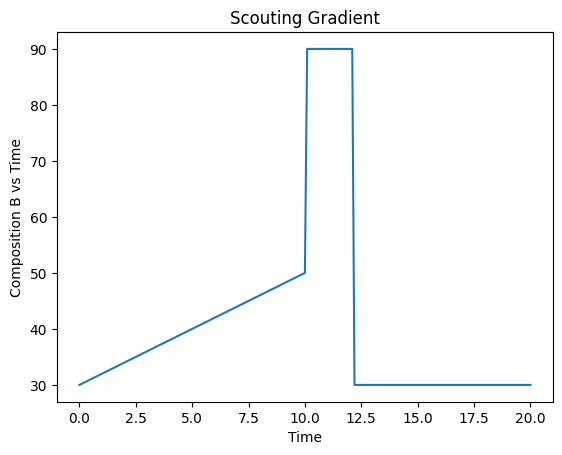

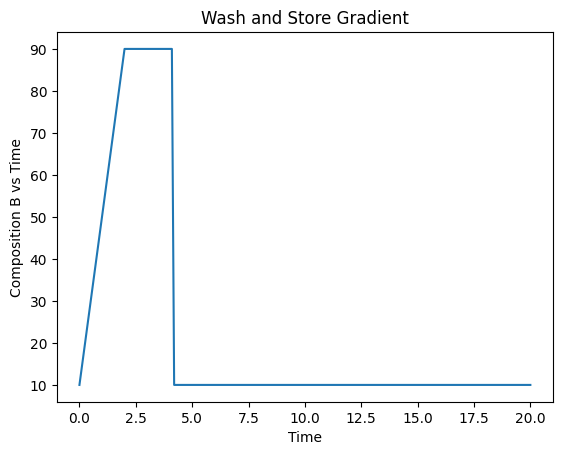

In [5]:
from datetime import datetime

time = datetime.now().strftime("%y%m%d%H%M%S")
experiment_name = f"{time}_0731_2"

# Lines used in experiment design
lines = {
    "A0": "T811",  # Strong
    "C0": "T810",  # Strong
    "D1": "T381",  # Weak
    "D3": "T809",  # Weak
}

# Lines used for cleaning column after run
cleaning_lines = {
    "A0": "T811",
    "D6": "IPA20",
}

# Column names
columns = {
    1: "BEH8",
    3: "CSH18",
    4: "Phenlhex",
}


samples_full_nnc = {
    "1:A,1": "0731-0000-0030-2B",
}

# shorten nnc numbers for easier use
samples = {}
for key, value in samples_full_nnc.items():
    if not validate_nnc_number(value):
        raise ValueError(f"Invalid NNC number: {value}")
    samples[key] = value[10:14]  # takes only molecule number

eluent_pairing_dict = {
    "T811": ["T381"],
    "T810": ["T809"],
}

cleaning_pairing_dict = {
    "T811": ["IPA20"],
}

# Method parameters
injection_volume = 2.0  # uL
flow_rate = 0.4  # experimental flow rate
flow_rate_low = 0.03  # flow rate to set to after run
rampup_time = 3.0  # time taken to ramp flow from 0.03 to 0.4 mL/min
rampdown_time = 3.0  # rampdown used to turn off column oven at end of run
equilibration_time = 5.0
column_condition_clean_time = 5.0
injection_run_time = 12.10  # find get from gradient table in future

injection_gradient_table = [
    {
        "Time": "Initial",
        "Flow": flow_rate,
        "CompositionA": "70.0",
        "CompositionB": "30.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "Initial",
    },
    {
        "Time": "10.00",
        "Flow": flow_rate,
        "CompositionA": "50.0",
        "CompositionB": "50.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "10.10",
        "Flow": flow_rate,
        "CompositionA": "10.0",
        "CompositionB": "90.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "12.10",
        "Flow": flow_rate,
        "CompositionA": "10.0",
        "CompositionB": "90.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "12.20",
        "Flow": flow_rate,
        "CompositionA": "70.0",
        "CompositionB": "30.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "15.00",
        "Flow": flow_rate,
        "CompositionA": "70.0",
        "CompositionB": "30.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "20.00",
        "Flow": flow_rate_low,
        "CompositionA": "70.0",
        "CompositionB": "30.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "11",
    },
]

# Ramp to high organic and fill with 20% IPA
cleaning_gradient_table = [
    {
        "Time": "Initial",
        "Flow": flow_rate,
        "CompositionA": "90.0",
        "CompositionB": "10.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "Initial",
    },
    {
        "Time": "2.0",
        "Flow": flow_rate,
        "CompositionA": "10.0",
        "CompositionB": "90.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "2.1",
        "Flow": flow_rate,
        "CompositionA": "10.0",
        "CompositionB": "90.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "4.1",
        "Flow": flow_rate,
        "CompositionA": "10.0",
        "CompositionB": "90.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "4.2",
        "Flow": flow_rate,
        "CompositionA": "90.0",
        "CompositionB": "10.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "10.0",
        "Flow": flow_rate,
        "CompositionA": "90.0",
        "CompositionB": "10.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "6",
    },
    {
        "Time": "20.0",
        "Flow": flow_rate_low,
        "CompositionA": "90.0",
        "CompositionB": "10.0",
        "CompositionC": "0.0",
        "CompositionD": "0.0",
        "Curve": "11",
    },
]

# plots for scouting and cleaning gradients
import matplotlib.pyplot as plt

time_values = [
    float(row["Time"]) if row["Time"] != "Initial" else 0
    for row in injection_gradient_table
]
compositionB_values = [float(row["CompositionB"]) for row in injection_gradient_table]

plt.plot(time_values, compositionB_values)
plt.xlabel("Time")
plt.title("Scouting Gradient")
plt.ylabel("Composition B vs Time")
plt.show()

time_values = [
    float(row["Time"]) if row["Time"] != "Initial" else 0
    for row in cleaning_gradient_table
]
compositionB_values = [float(row["CompositionB"]) for row in cleaning_gradient_table]

plt.plot(time_values, compositionB_values)
plt.xlabel("Time")
plt.title("Wash and Store Gradient")
plt.ylabel("Composition B vs Time")
plt.show()

Processed Inputs

In [9]:
from typing import Optional, List
from OptiHPLCHandler import EmpowerInstrumentMethod
from OptiHPLCHandler.utils.validate_method_name import append_truncate_method_name
from OptiHPLCHandler.applications.empower_implementation.empower_tools import (
    classify_eluents,
)
from OptiHPLCHandler.utils.validate_gradient_table import validate_gradient_table
from OptiHPLCHandler.applications.revert_method import revert_method
from OptiHPLCHandler.applications.generate_basic_robustness_methods import (
    _post_and_revert_instrument_methodset_method,
)
from pprint import pprint
from OptiHPLCHandler.applications.method_generators.ramp_method import (
    generate_ramp_method,
)
from OptiHPLCHandler.applications.method_generators.condense_gradient_table import (
    generate_condense_gradient_table,
)


def remove_composition_from_eluent(eluent: str) -> str:
    """
    Remove the composition from the eluent.
    """
    return eluent.replace("Composition", "").strip()


def change_eluent_gradient_table(
    gradient_table: List[dict],
    strong_eluent_line: str,
    weak_eluent_line: str,
) -> List[dict]:
    """
    Change the eluent in the gradient table.
    """
    # check strong and weak eluent lines are different
    if strong_eluent_line == weak_eluent_line:
        raise ValueError("Strong and weak eluent lines must be different.")

    gradient_table = [
        {key: str(value) for key, value in row.items()} for row in gradient_table
    ]  # convert all values to strings

    # determine eluent classifications
    dict_eluent_classification = classify_eluents(gradient_table)

    list_strong_eluents = dict_eluent_classification["strong_eluents"]
    list_weak_eluents = dict_eluent_classification["weak_eluents"]

    if len(list_strong_eluents) != 1:
        raise ValueError("Only one strong eluent is allowed.")
    template_method_strong_eluent_line = list_strong_eluents[0]

    if len(list_weak_eluents) != 1:
        raise ValueError("Only one weak eluent is allowed.")
    template_method_weak_eluent_line = list_weak_eluents[0]

    # change eluent
    for row in gradient_table:
        # find value of strong eluent
        strong_eluent_value = row.get(template_method_strong_eluent_line)
        # find value of weak eluent
        weak_eluent_value = row.get(
            template_method_weak_eluent_line
        )  # need to find the non zero value

        # change strong eluent
        if strong_eluent_value is not None:
            # set new strong eluent
            row[strong_eluent_line] = strong_eluent_value

        # change weak eluent
        if weak_eluent_value is not None:
            # set new weak eluent
            row[weak_eluent_line] = weak_eluent_value

        # set all others to "0.0"
        for key in row.keys():
            if key.startswith("Composition"):
                if key not in [strong_eluent_line, weak_eluent_line]:
                    row[key] = "0.0"

    validate_gradient_table(gradient_table)

    return gradient_table


def change_eluent_gradient_table_in_method(
    method: EmpowerInstrumentMethod,
    gradient_table: List[dict],
    strong_eluent_line: str,
    weak_eluent_line: str,
    suffix: Optional[str] = None,
) -> EmpowerInstrumentMethod:
    # Variables
    if suffix is None:
        suffix = f"_{remove_composition_from_eluent(strong_eluent_line)}_{remove_composition_from_eluent(weak_eluent_line)}"

    # generate method name
    method.method_name = append_truncate_method_name(method.method_name, suffix)
    # gradient table variable
    strong_eluent_line = strong_eluent_line[:-1]  # remove valve number
    weak_eluent_line = weak_eluent_line[:-1]  # remove valve number
    method.gradient_table = change_eluent_gradient_table(
        gradient_table, strong_eluent_line, weak_eluent_line
    )

    return method


def find_eluent_position(
    position_dict: dict,
    eluent: str,
) -> tuple[str, str]:
    for key, value in position_dict.items():
        if value == eluent:
            eluent_position = key
            eluent_composition = (
                f"Composition{eluent_position}"  # note still keeps valve number eg. D2
            )
            return eluent_position, eluent_composition


def change_eluent_valves_position(
    valve_position: List[str],
    strong_eluent_line: str,
    weak_eluent_line: str,
) -> List[str]:
    for position in valve_position:
        if position.startswith(strong_eluent_line[0]):
            valve_position[valve_position.index(position)] = strong_eluent_line
        if position.startswith(weak_eluent_line[0]):
            valve_position[valve_position.index(position)] = weak_eluent_line
    return valve_position


def change_eluent_in_method(
    method: EmpowerInstrumentMethod,
    gradient_table: List[dict],
    template_method_name: str,
    eluent_pairing_dict: dict,
    eluent_lines: dict,
) -> List[str]:
    revert_method(method, template_method_name)  # sets name to eln number
    instrument_method_list = []
    for strong_eluent, weak_eluent_list in eluent_pairing_dict.items():
        for weak_eluent in weak_eluent_list:
            # find position of strong and weak eluent
            strong_eluent_line, strong_eluent_line_composition = find_eluent_position(
                eluent_lines, strong_eluent
            )
            weak_eluent_line, weak_eluent_line_composition = find_eluent_position(
                eluent_lines, weak_eluent
            )

            # change valve position
            template_method.valve_position = change_eluent_valves_position(
                template_method.valve_position, strong_eluent_line, weak_eluent_line
            )

            # change eluent gradient table
            method = change_eluent_gradient_table_in_method(
                template_method,
                gradient_table,
                strong_eluent_line_composition,
                weak_eluent_line_composition,
            )  # changing variable name for clarity but it overwrites templatemethod
            instrument_method_list.append(
                {
                    "method_name": method.method_name,
                    "gradient_table": method.gradient_table,
                    "valve_position": method.valve_position,
                    "strong_eluent_line": strong_eluent_line,
                    "weak_eluent_line": weak_eluent_line,
                    "strong_eluent": strong_eluent,
                    "weak_eluent": weak_eluent,
                    "method": method,
                }
            )

            # Save method
            _post_and_revert_instrument_methodset_method(
                handler, method, experiment_name
            )
            # revert_method(method, template_method_name) # not needed when saving method
    return instrument_method_list

In [7]:
template_method = handler.GetInstrumentMethod(
    "240708151039_0731_B0_D2"
)  # get the template method

In [10]:
instrument_method_list = change_eluent_in_method(
    template_method,
    injection_gradient_table,
    experiment_name,
    eluent_pairing_dict,
    lines,
)

pprint(instrument_method_list)

[{'gradient_table': [{'CompositionA': '30.0',
                      'CompositionB': '0.0',
                      'CompositionC': '0.0',
                      'CompositionD': '70.0',
                      'Curve': 'Initial',
                      'Flow': '0.4',
                      'Time': 'Initial'},
                     {'CompositionA': '50.0',
                      'CompositionB': '0.0',
                      'CompositionC': '0.0',
                      'CompositionD': '50.0',
                      'Curve': '6',
                      'Flow': '0.4',
                      'Time': '10.0'},
                     {'CompositionA': '90.0',
                      'CompositionB': '0.0',
                      'CompositionC': '0.0',
                      'CompositionD': '10.0',
                      'Curve': '6',
                      'Flow': '0.4',
                      'Time': '10.1'},
                     {'CompositionA': '90.0',
                      'CompositionB': '0.0',
                  

In [11]:
# Make Methods for rampup and initial cleaning
method_parameters_for_condition = instrument_method_list[0]  # first method
revert_method(template_method, experiment_name)
generate_ramp_method(template_method, rampup_time, 0.03, suffix="_r")
rampup_method_name = template_method.method_name
_post_and_revert_instrument_methodset_method(handler, template_method, experiment_name)
# revert_method(template_method, eln_no)
generate_condense_gradient_table(
    template_method, new_method_time=column_condition_clean_time, suffix="_cl"
)
condense_method_name = template_method.method_name
_post_and_revert_instrument_methodset_method(handler, template_method, experiment_name)

In [12]:
sample_set_list = []
# Create sample set for rampup and initial cleaning
for column_position, column_name in columns.items():
    condition_ramp_sample_set_row = {
        "Function": {"member": "Condition Column"},
        "Method": rampup_method_name,
        "RunTime": rampup_time,
        "ColumnPosition": {"member": f"Position {column_position}"},
    }
    print(condition_ramp_sample_set_row)
    sample_set_list.append(condition_ramp_sample_set_row)

    condition_clean_sample_set_row = {
        "Function": {"member": "Condition Column"},
        "Method": condense_method_name,
        "RunTime": column_condition_clean_time,
        "ColumnPosition": {"member": f"Position {column_position}"},
    }
    print(condition_clean_sample_set_row)
    sample_set_list.append(condition_clean_sample_set_row)
    # Add equilibration and sample injection
    for method in instrument_method_list:
        for sample_position, sample_name in samples.items():
            injection_method_name = method["method_name"]
            equilibration_sample_set_row = {
                "Function": {"member": "Equilibrate"},
                "Method": injection_method_name,
                "RunTime": equilibration_time,
                "ColumnPosition": {"member": f"Position {column_position}"},
            }
            print(equilibration_sample_set_row)
            sample_set_list.append(equilibration_sample_set_row)

            strong_eluent = method["strong_eluent"]
            weak_eluent = method["weak_eluent"]
            conditions_string = (
                f"{column_name}_{sample_name}_{strong_eluent}_{weak_eluent}"
            )
            sample_injection_sample_set_row = {
                "Method": injection_method_name,
                "SamplePos": sample_position,
                "Label": samples_full_nnc[sample_position],
                "SampleName": conditions_string,
                "InjectionVolume": injection_volume,
                "RunTime": injection_run_time,
            }
            print(sample_injection_sample_set_row)
            sample_set_list.append(sample_injection_sample_set_row)

{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_r', 'RunTime': 3.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_cl', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Function': {'member': 'Equilibrate'}, 'Method': '240709123517_0731_2_A0_D1', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Method': '240709123517_0731_2_A0_D1', 'SamplePos': '1:A,1', 'Label': '0731-0000-0030-2B', 'SampleName': 'BEH8_0030_T811_T381', 'InjectionVolume': 2.0, 'RunTime': 12.1}
{'Function': {'member': 'Equilibrate'}, 'Method': '240709123517_0731_2_C0_D3', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Method': '240709123517_0731_2_C0_D3', 'SamplePos': '1:A,1', 'Label': '0731-0000-0030-2B', 'SampleName': 'BEH8_0030_T810_T809', 'InjectionVolume': 2.0, 'RunTime': 12.1}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_r', 'RunTime': 3.0, 'Colu

In [13]:
# End cleaning and shutdown all columns
# Create post-cleaning and storage methods
new_cleaning_method_name = f"{experiment_name}_cl"
cleaning_method_list = change_eluent_in_method(
    template_method,
    cleaning_gradient_table,
    new_cleaning_method_name,
    cleaning_pairing_dict,
    cleaning_lines,
)

# Clean columns and fill with IPA
revert_method(template_method, experiment_name)
generate_condense_gradient_table(
    template_method, new_method_time=column_condition_clean_time, suffix="_clf"
)
condense_method_name = template_method.method_name
_post_and_revert_instrument_methodset_method(handler, template_method, experiment_name)

In [14]:
# rampdown to shut off column
revert_method(template_method, experiment_name)
generate_ramp_method(
    template_method,
    ramp_time=3,
    low_flow_rate=flow_rate_low,
    suffix="_s",
    reduce_column_temperature=True,
    ramp_type="rampdown",
)
rampdown_method_name = template_method.method_name
_post_and_revert_instrument_methodset_method(handler, template_method, experiment_name)

In [15]:
for method in cleaning_method_list:
    length_of_column_list = len(columns)
    for column_position, column_name in columns.items():
        condition_end_clean_sample_set_row = {
            "Function": {"member": "Condition Column"},
            "Method": condense_method_name,
            "RunTime": column_condition_clean_time,
            "ColumnPosition": {"member": f"Position {column_position}"},
        }
        print(condition_end_clean_sample_set_row)
        sample_set_list.append(condition_end_clean_sample_set_row)

        rampdown_sample_set_row = {
            "Function": {"member": "Condition Column"},
            "Method": rampdown_method_name,
            "RunTime": rampdown_time,
            "ColumnPosition": {"member": f"Position {column_position}"},
        }
        print(rampdown_sample_set_row)
        sample_set_list.append(rampdown_sample_set_row)

{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_clf', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_s', 'RunTime': 3.0, 'ColumnPosition': {'member': 'Position 1'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_clf', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 3'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_s', 'RunTime': 3.0, 'ColumnPosition': {'member': 'Position 3'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_clf', 'RunTime': 5.0, 'ColumnPosition': {'member': 'Position 4'}}
{'Function': {'member': 'Condition Column'}, 'Method': '240709123517_0731_2_s', 'RunTime': 3.0, 'ColumnPosition': {'member': 'Position 4'}}


In [16]:
sample_set_list

[{'Function': {'member': 'Condition Column'},
  'Method': '240709123517_0731_2_r',
  'RunTime': 3.0,
  'ColumnPosition': {'member': 'Position 1'}},
 {'Function': {'member': 'Condition Column'},
  'Method': '240709123517_0731_2_cl',
  'RunTime': 5.0,
  'ColumnPosition': {'member': 'Position 1'}},
 {'Function': {'member': 'Equilibrate'},
  'Method': '240709123517_0731_2_A0_D1',
  'RunTime': 5.0,
  'ColumnPosition': {'member': 'Position 1'}},
 {'Method': '240709123517_0731_2_A0_D1',
  'SamplePos': '1:A,1',
  'Label': '0731-0000-0030-2B',
  'SampleName': 'BEH8_0030_T811_T381',
  'InjectionVolume': 2.0,
  'RunTime': 12.1},
 {'Function': {'member': 'Equilibrate'},
  'Method': '240709123517_0731_2_C0_D3',
  'RunTime': 5.0,
  'ColumnPosition': {'member': 'Position 1'}},
 {'Method': '240709123517_0731_2_C0_D3',
  'SamplePos': '1:A,1',
  'Label': '0731-0000-0030-2B',
  'SampleName': 'BEH8_0030_T810_T809',
  'InjectionVolume': 2.0,
  'RunTime': 12.1},
 {'Function': {'member': 'Condition Column'},

In [17]:
plate = "ANSI-48Vial2mLHolder"
plates = {"1": plate, "2": plate}
handler.PostExperiment(
    sample_set_method_name=experiment_name,
    sample_list=sample_set_list,
    plates=plates,
    audit_trail_message=None,
)
handler.logout()